# Notebook for initial data analysis

In [ ]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import os
from pathlib import Path

In [36]:
# Two paths specified; one for pc and another for colab

data_path = f'{Path(os.getcwd()).parent}/data/heart.csv'
# data_path = '/content/heart.csv'

In [37]:
# Read dataset
# Info and describe
data = pd.read_csv(data_path)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


It seems like there are no null values in the dataframe. Let's double check.

In [39]:
data.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

No null values - which means no cleaning is required.

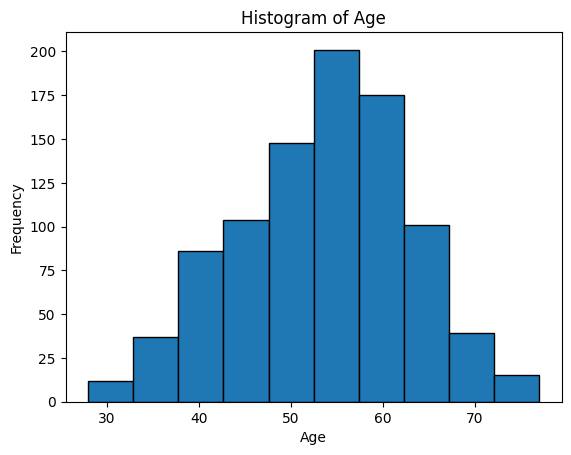

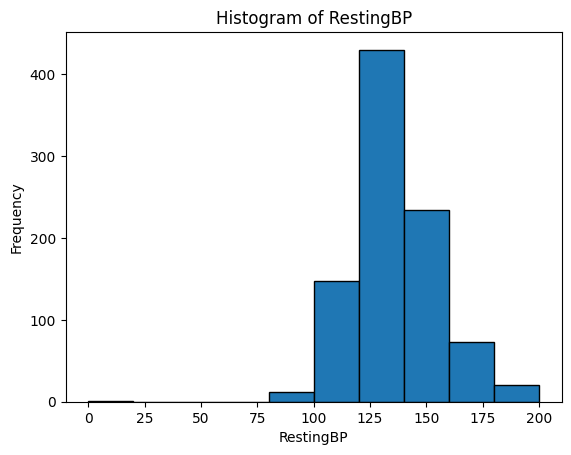

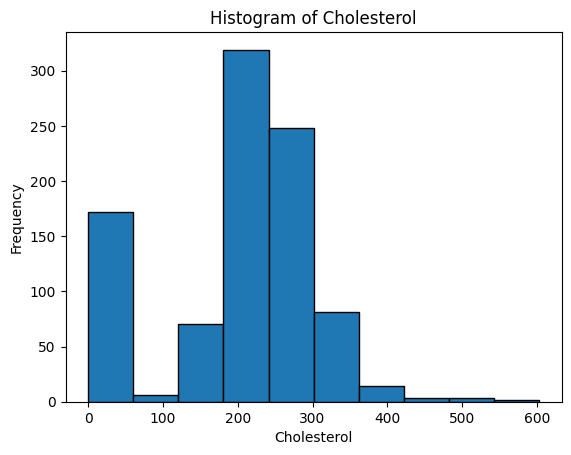

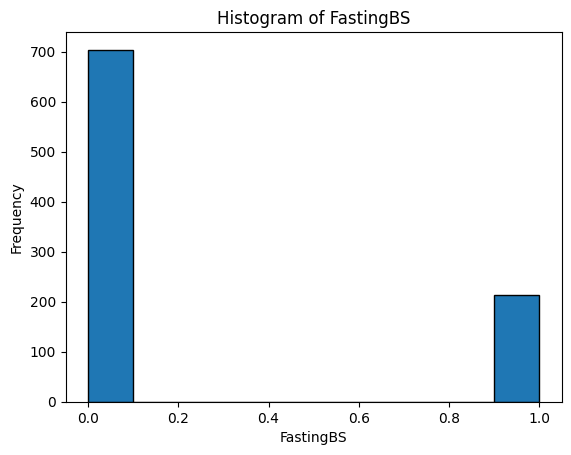

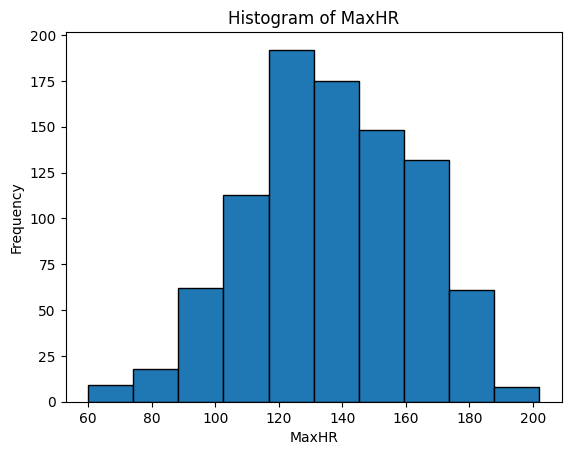

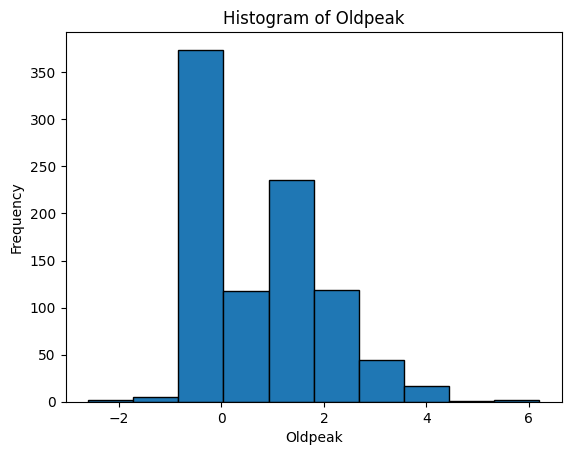

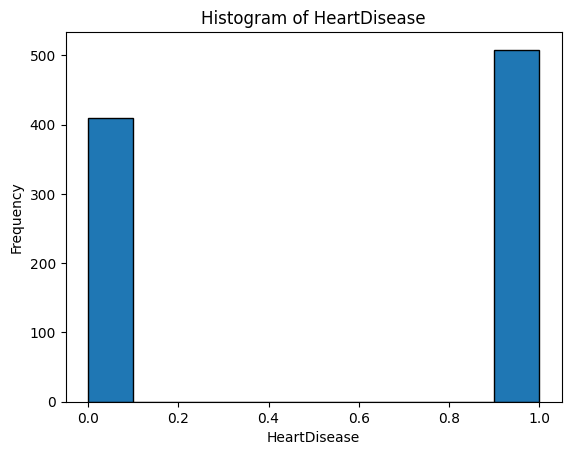

In [63]:
# histogram for numeric data

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# loop to create histogram for the selected columns
for col in numerical_columns:
  plt.figure()
  plt.hist(data[col], bins=10, edgecolor='black')
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

All numeric features are normally distributed - so there's nothing notable here.

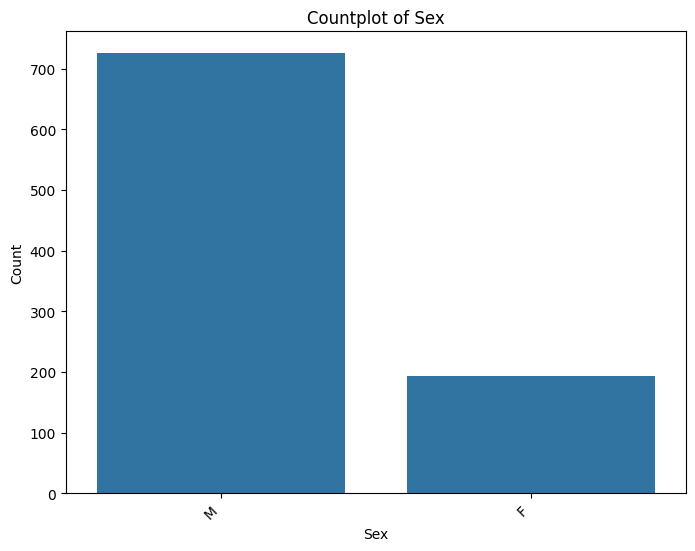

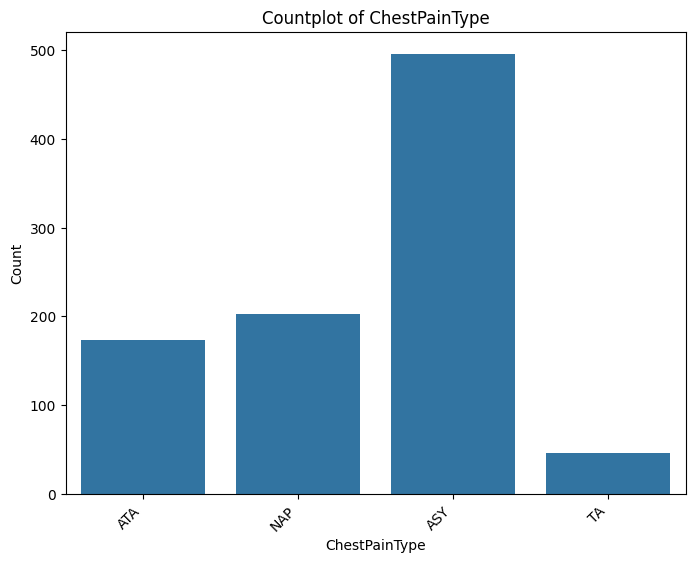

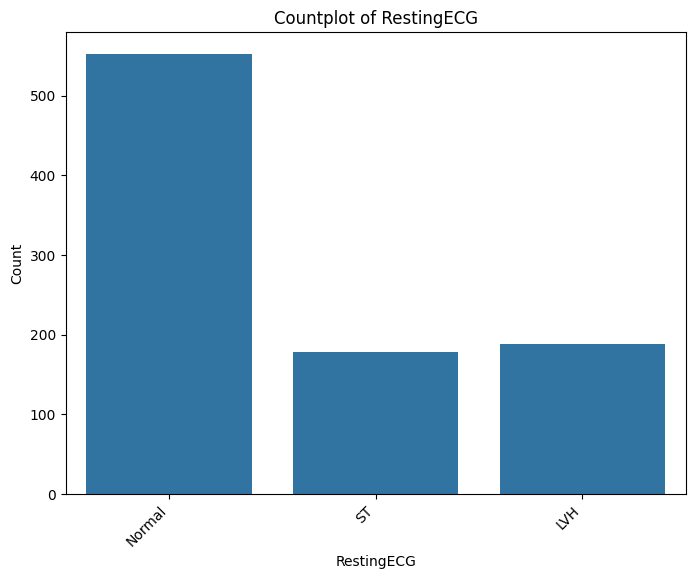

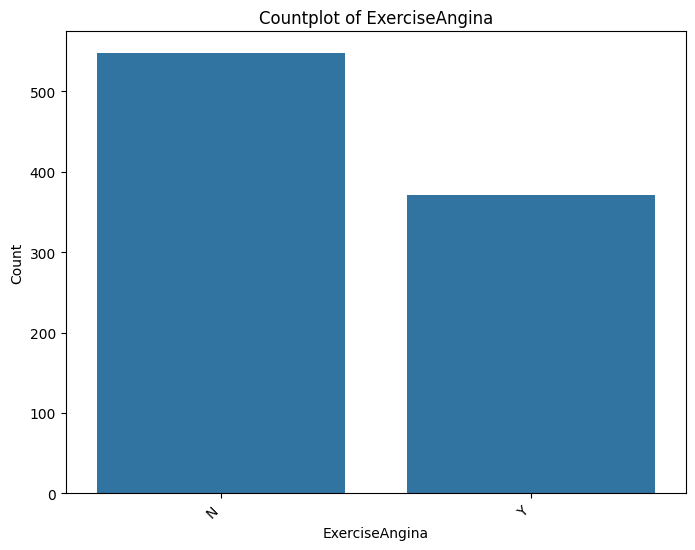

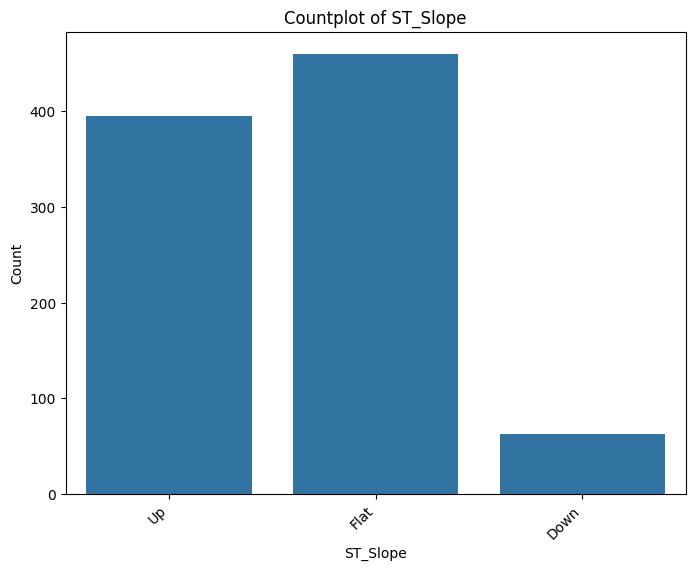

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#selecting columns with non-integer (or object) for extracting countplots
categorical_columns = data.select_dtypes(include=['object']).columns

# loop to create countplots for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

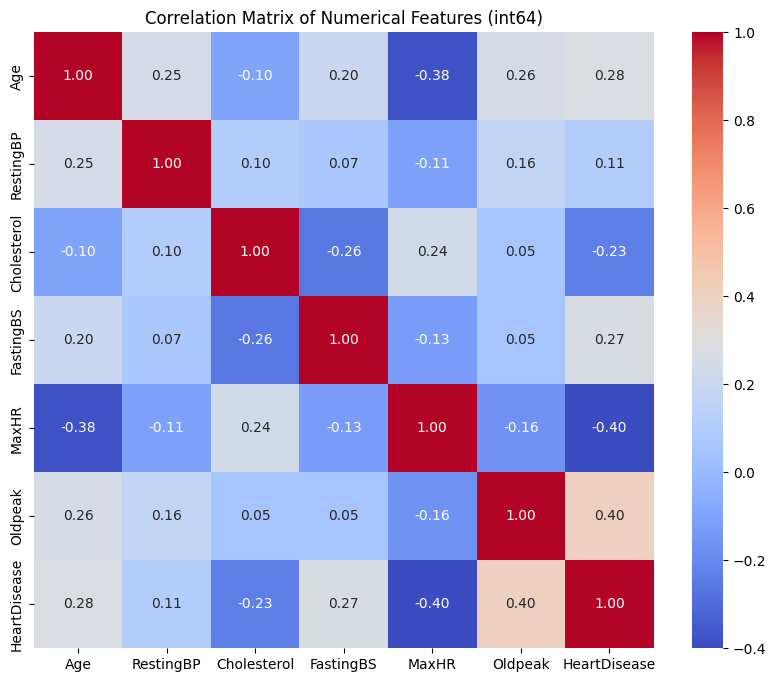

In [64]:
# store correlation matrix in a variable
correlation_matrix = data[data.select_dtypes(include=['int64', 'float64']).columns].corr()

# extracting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (int64)')
plt.show()

## Outlier Analysis

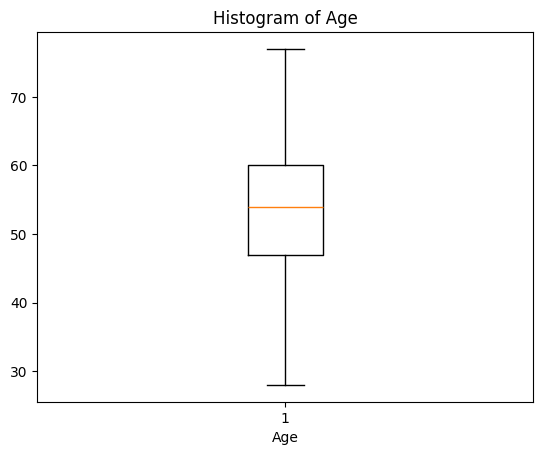

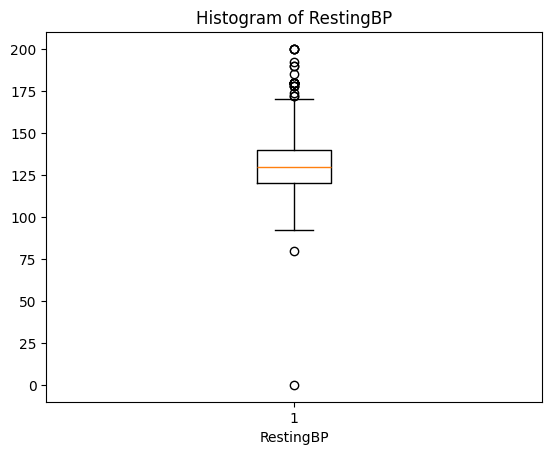

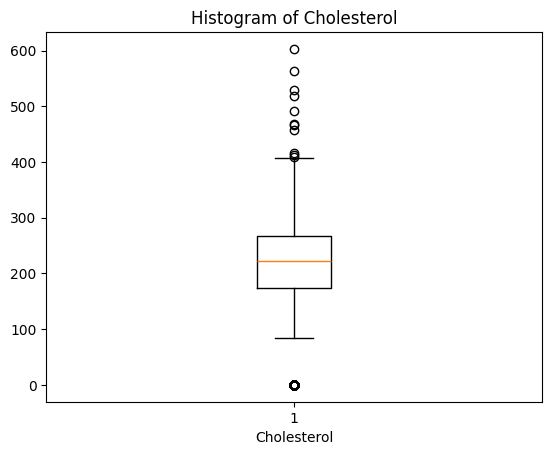

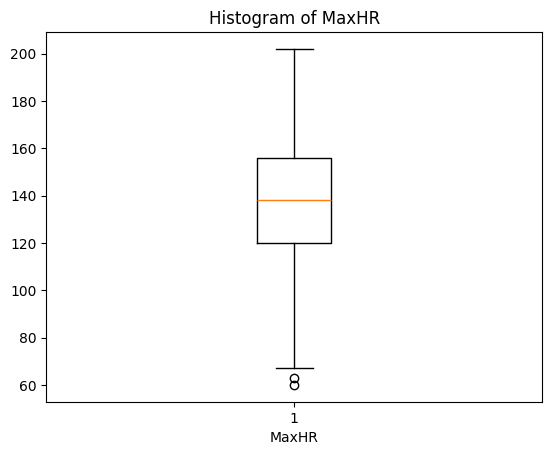

In [65]:
numerical_columns = data.select_dtypes(include=['int64']).columns

numerical_columns = numerical_columns.drop(["HeartDisease", "FastingBS"]) 
for col in numerical_columns:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.show()

The values of Cholesterol and RestingBP are both 0. This is an unusual outlier; let's dig deeper. 

In [66]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


I want to check the distribution of value counts of HeartDisease when values for Cholesterol are 0.

In [67]:
data[data['Cholesterol'] == 0]['HeartDisease'].value_counts() 

HeartDisease
1    152
0     20
Name: count, dtype: int64

My guess is that this value is MNAR, and instead what's been done is replace missing values with 0. This is rather unusual.

In [68]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


There is only one value with RestingBP = 0. And in this case, HeartDisease=1. So this is definitely not an error in calculation. Notably, in this case, both Cholesterol and FastingBS are also 0.